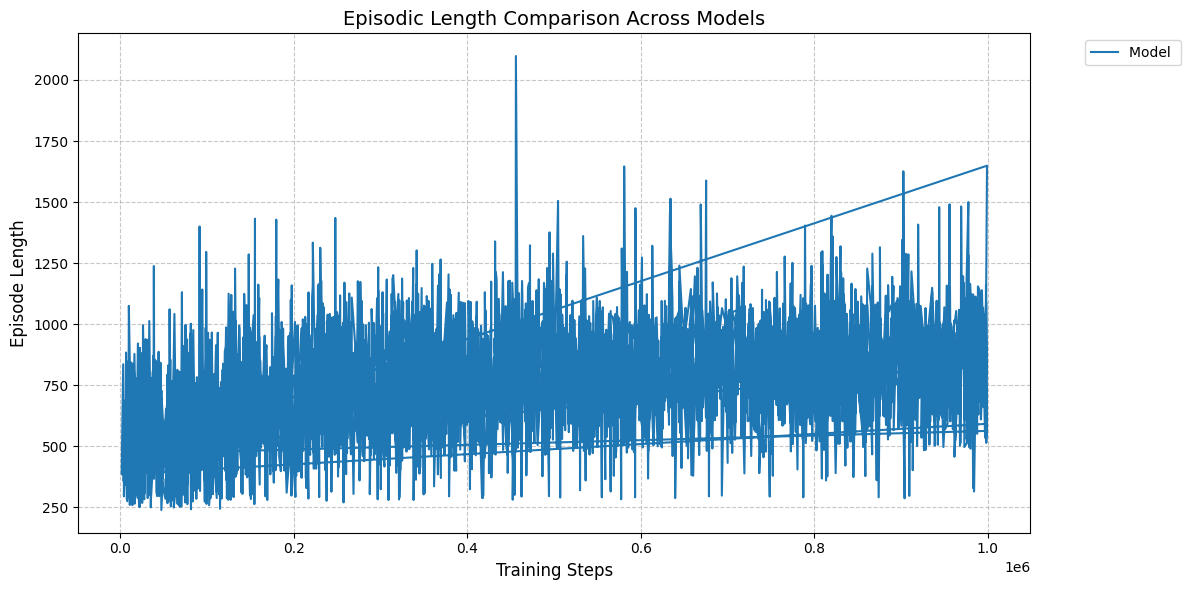

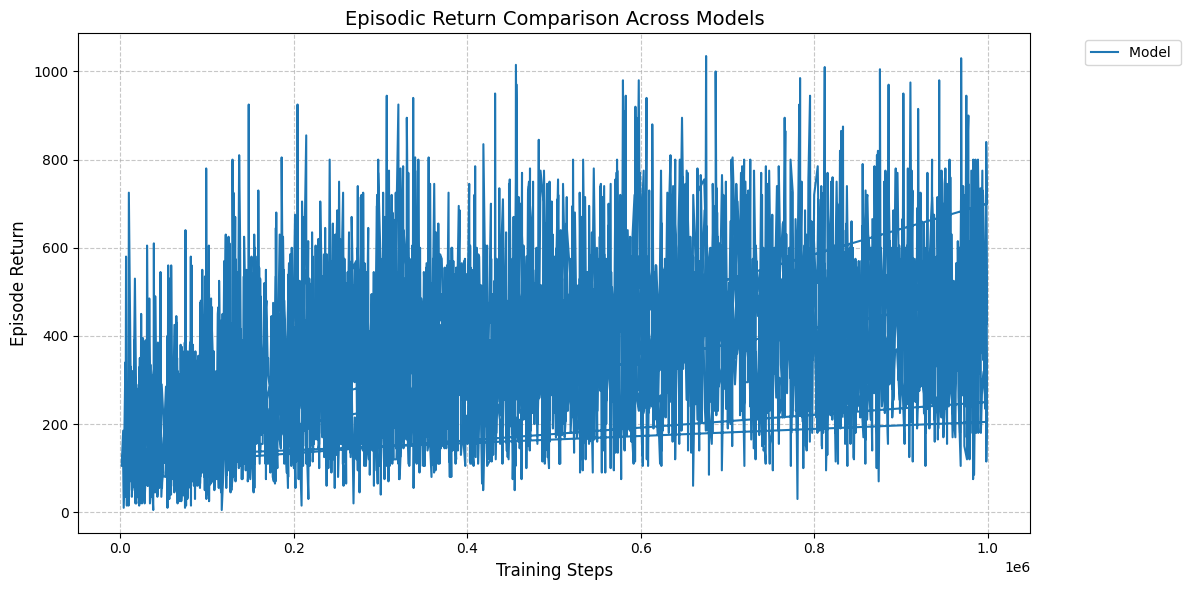

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import glob



# Function to read and process a CSV file
def read_csv(filepath):
    df = pd.read_csv(filepath)
    # Extract model name from filepath
    model_name = filepath.split('_')[-3]  # Adjust splitting based on your filename pattern
    df['model'] = model_name
    return df

# Read all episodic length files
length_files = glob.glob('data/episodic_length/**.csv')
length_dfs = []

for file in length_files:
    df = read_csv(file)
    length_dfs.append(df)

# Combine all dataframes
length_data = pd.concat(length_dfs, ignore_index=True)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot episodic length for each model
for model in length_data['model'].unique():
    model_data = length_data[length_data['model'] == model]
    plt.plot(model_data['Step'], model_data['Value'], label=f'Model {model}')

plt.title('Episodic Length Comparison Across Models', fontsize=14)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Episode Length', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Create a similar plot for episodic returns
return_files = glob.glob('data/episodic_return/**.csv')
return_dfs = []

for file in return_files:
    df = read_csv(file)
    return_dfs.append(df)

return_data = pd.concat(return_dfs, ignore_index=True)

plt.figure(figsize=(12, 6))

for model in return_data['model'].unique():
    model_data = return_data[return_data['model'] == model]
    plt.plot(model_data['Step'], model_data['Value'], label=f'Model {model}')

plt.title('Episodic Return Comparison Across Models', fontsize=14)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Episode Return', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

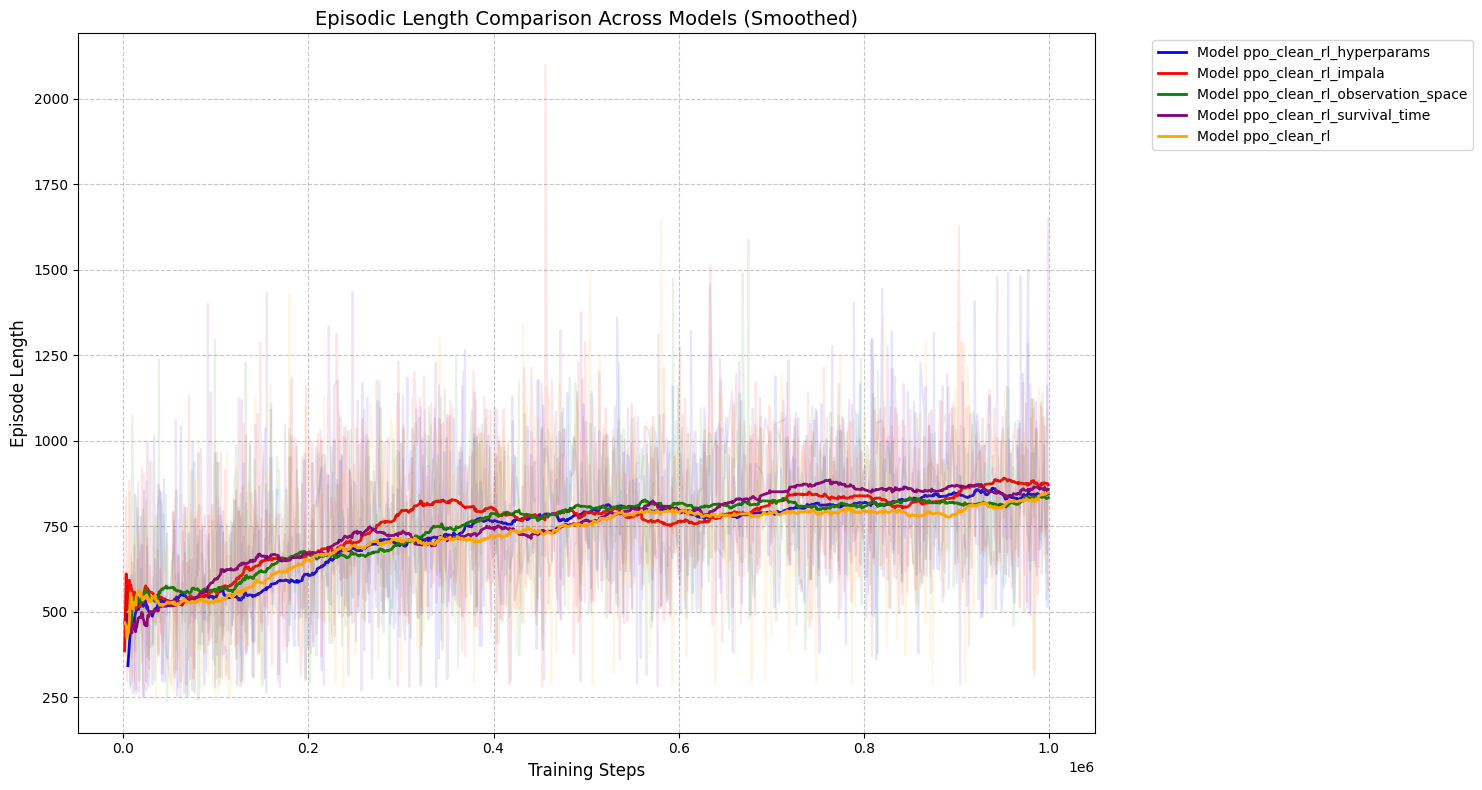

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# Function to read and process a CSV file
def read_csv(filepath):
    df = pd.read_csv(filepath)
    model_name = filepath.split('__')[1].split('__')[0]
    df['model'] = model_name
    return df

# Function to apply smoothing
def smooth_data(series, window=100):  # You can adjust the window size
    return series.rolling(window=window, min_periods=1).mean()

# Read all episodic length files
length_files = glob.glob('data/episodic_length/**.csv')
length_dfs = []

for file in length_files:
    df = read_csv(file)
    length_dfs.append(df)

# Combine all dataframes
length_data = pd.concat(length_dfs, ignore_index=True)

# Create the plot with a larger figure size
plt.figure(figsize=(15, 8))

# Plot episodic length for each model with smoothing
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, model in enumerate(length_data['model'].unique()):
    model_data = length_data[length_data['model'] == model]
    
    # Apply smoothing to the Values
    smoothed_values = smooth_data(model_data['Value'])
    
    # Plot both raw data (with high transparency) and smoothed data
    plt.plot(model_data['Step'], model_data['Value'], 
             alpha=0.1,  # Very transparent for raw data
             color=colors[i % len(colors)])
    plt.plot(model_data['Step'], smoothed_values, 
             label=f'Model {model}',
             color=colors[i % len(colors)],
             linewidth=2)  # Make smoothed line thicker

plt.title('Episodic Length Comparison Across Models (Smoothed)', fontsize=14)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Episode Length', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

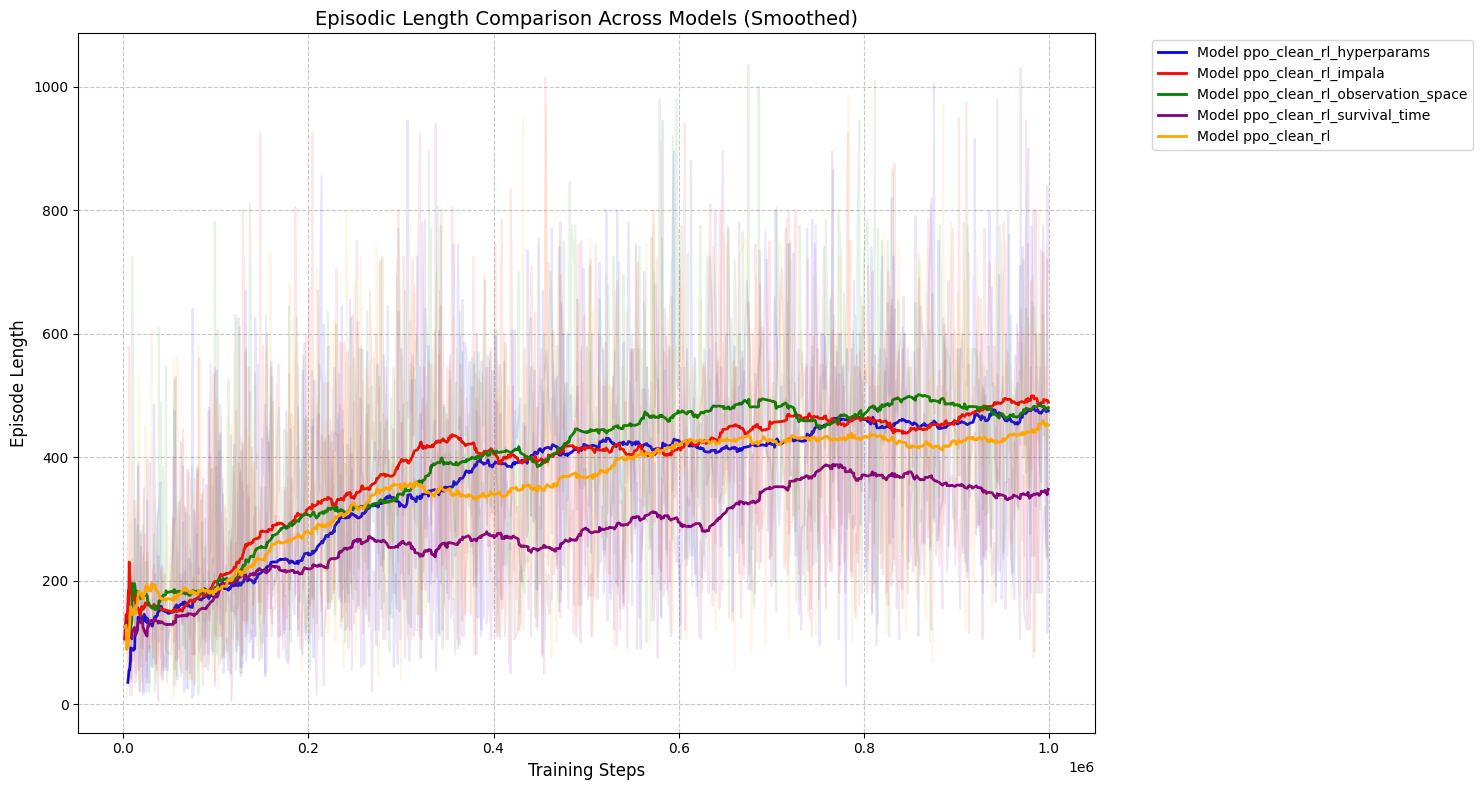

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# Function to read and process a CSV file
def read_csv(filepath):
    df = pd.read_csv(filepath)
    model_name = filepath.split('__')[1].split('__')[0]
    df['model'] = model_name
    return df

# Function to apply smoothing
def smooth_data(series, window=100):  # You can adjust the window size
    return series.rolling(window=window, min_periods=1).mean()

# Read all episodic length files
length_files = glob.glob('data/episodic_return/**.csv')
length_dfs = []

for file in length_files:
    df = read_csv(file)
    length_dfs.append(df)

# Combine all dataframes
length_data = pd.concat(length_dfs, ignore_index=True)

# Create the plot with a larger figure size
plt.figure(figsize=(15, 8))

# Plot episodic length for each model with smoothing
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, model in enumerate(length_data['model'].unique()):
    model_data = length_data[length_data['model'] == model]
    
    # Apply smoothing to the Values
    smoothed_values = smooth_data(model_data['Value'])
    
    # Plot both raw data (with high transparency) and smoothed data
    plt.plot(model_data['Step'], model_data['Value'], 
             alpha=0.1,  # Very transparent for raw data
             color=colors[i % len(colors)])
    plt.plot(model_data['Step'], smoothed_values, 
             label=f'Model {model}',
             color=colors[i % len(colors)],
             linewidth=2)  # Make smoothed line thicker

plt.title('Episodic Length Comparison Across Models (Smoothed)', fontsize=14)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Episode Length', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

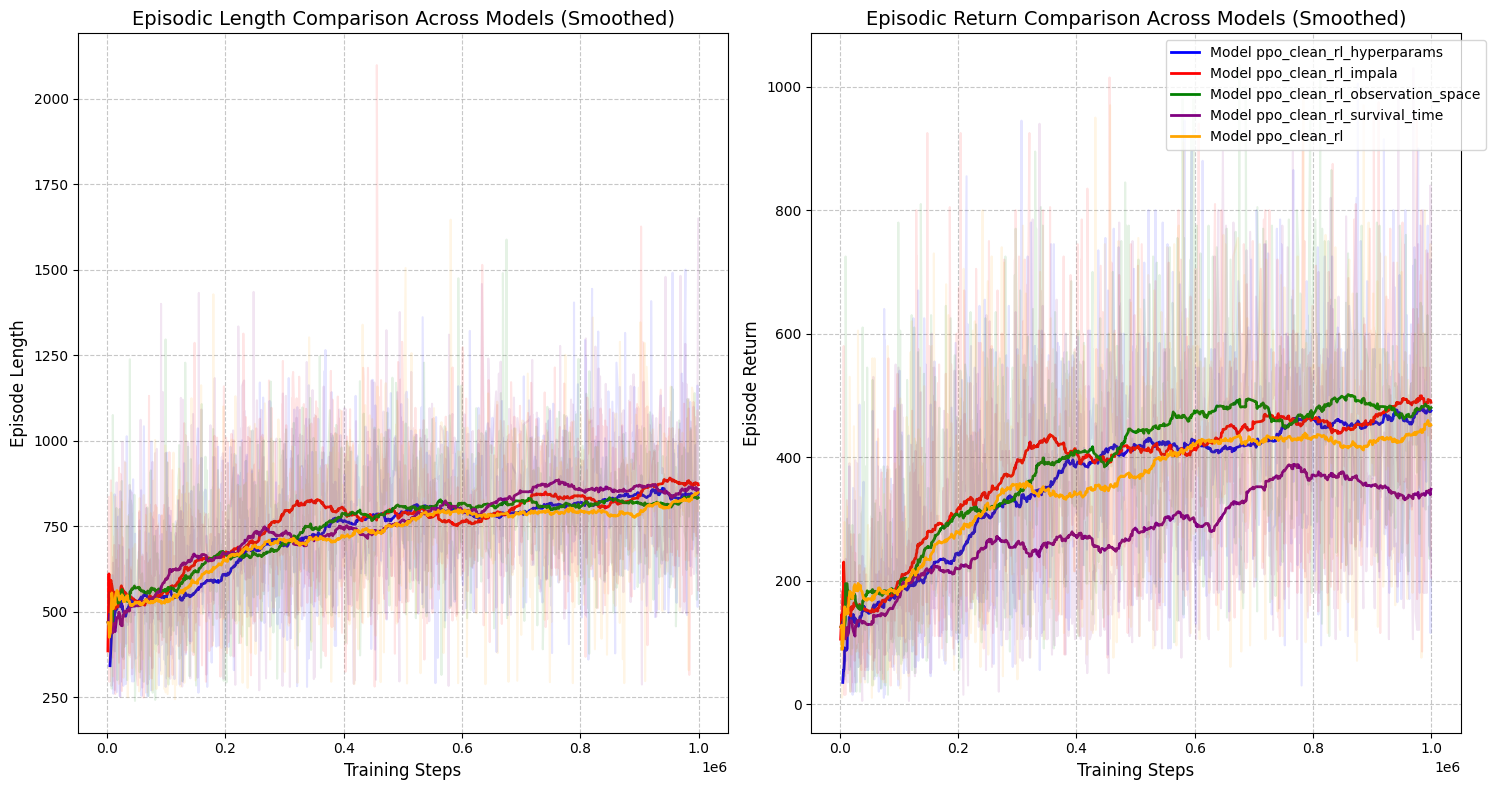

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# Function to read and process a CSV file
def read_csv(filepath):
    df = pd.read_csv(filepath)
    model_name = filepath.split('__')[1].split('__')[0]
    df['model'] = model_name
    return df

# Function to apply smoothing
def smooth_data(series, window=100):
    return series.rolling(window=window, min_periods=1).mean()

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Colors for consistent model representation
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Plot episodic length
length_files = glob.glob('data/episodic_length/**.csv')
length_dfs = []

for file in length_files:
    df = read_csv(file)
    length_dfs.append(df)

length_data = pd.concat(length_dfs, ignore_index=True)

for i, model in enumerate(length_data['model'].unique()):
    model_data = length_data[length_data['model'] == model]
    smoothed_values = smooth_data(model_data['Value'])
    
    ax1.plot(model_data['Step'], model_data['Value'], 
             alpha=0.1,
             color=colors[i % len(colors)])
    ax1.plot(model_data['Step'], smoothed_values, 
             label=f'Model {model}',
             color=colors[i % len(colors)],
             linewidth=2)

ax1.set_title('Episodic Length Comparison Across Models (Smoothed)', fontsize=14)
ax1.set_xlabel('Training Steps', fontsize=12)
ax1.set_ylabel('Episode Length', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot episodic return
return_files = glob.glob('data/episodic_return/**.csv')
return_dfs = []

for file in return_files:
    df = read_csv(file)
    return_dfs.append(df)

return_data = pd.concat(return_dfs, ignore_index=True)

for i, model in enumerate(return_data['model'].unique()):
    model_data = return_data[return_data['model'] == model]
    smoothed_values = smooth_data(model_data['Value'])
    
    ax2.plot(model_data['Step'], model_data['Value'], 
             alpha=0.1,
             color=colors[i % len(colors)])
    ax2.plot(model_data['Step'], smoothed_values, 
             label=f'Model {model}',
             color=colors[i % len(colors)],
             linewidth=2)

ax2.set_title('Episodic Return Comparison Across Models (Smoothed)', fontsize=14)
ax2.set_xlabel('Training Steps', fontsize=12)
ax2.set_ylabel('Episode Return', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()